In [163]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
import warnings

init_notebook_mode(connected=True)

warnings.filterwarnings("ignore")

%matplotlib inline

In [217]:
data = pd.read_csv('US_Accidents_Dec21_updated.csv')

In [218]:
data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [219]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [166]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [167]:
len(data)

2845342

In [168]:
data.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [169]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])

<AxesSubplot:ylabel='None'>

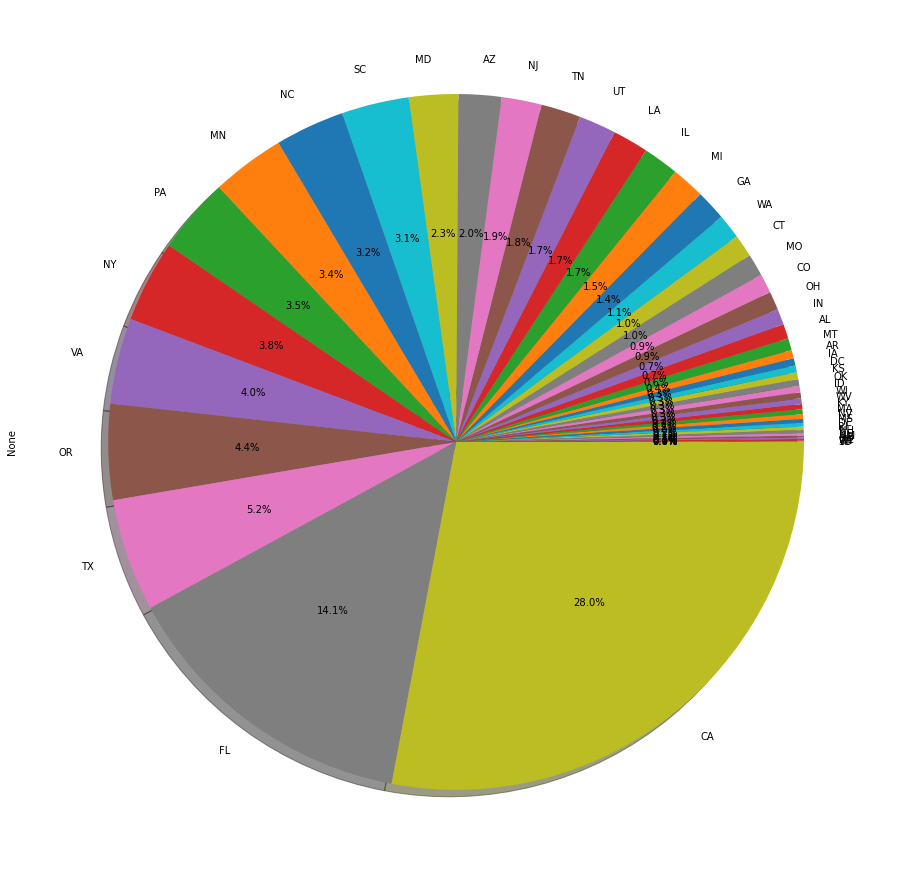

In [170]:
data.groupby(by = 'State').size().sort_values().plot.pie(autopct = '%1.1f%%',shadow = True, figsize = (16,16))

In [171]:
top_10_state = data[['City','State' , 'Severity']].groupby('State').agg({'City' : 'count' , 
                                                       'Severity' : 'mean' }).sort_values(
    by='City',ascending=False).head(10)

In [172]:
top_10_state

,City,Severity
State,,
CA,795861,2.041998
FL,401382,2.069359
TX,149037,2.184941
OR,126338,2.073705
VA,113535,2.176650
NY,108024,2.216198
PA,99975,2.203441
MN,97182,2.047085
NC,91362,2.118364


In [173]:
df_state_city = data[['State' , 'City','Severity']].groupby(['State' , 'City']).count().rename(columns = {'Severity' : 'Count'})

top_10_city = df_state_city.sort_values(by='Count' , ascending = False).head(10)

In [174]:
df_state_city

Count
State City              
AL    Abbeville        6
      Adamsville       6
      Addison          2
      Alabaster      188
      Albertville     10
...                  ...
WY    Torrington       2
      Wamsutter       69
      Wheatland       26
      Wilson           4
      Worland          1

[16930 rows x 1 columns]

In [175]:
top_10_city

Count
State City               
FL    Miami        106896
CA    Los Angeles   68956
FL    Orlando       54654
TX    Dallas        41615
      Houston       39366
NC    Charlotte     32998
CA    Sacramento    32559
      San Diego     26627
NC    Raleigh       22837
MN    Minneapolis   22768

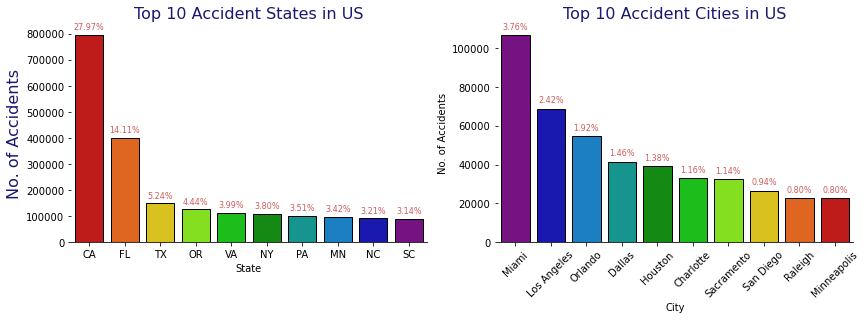

In [176]:
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(14,4))

bar = sns.barplot(x=top_10_state.index , y=top_10_state['City'],
                  palette='nipy_spectral_r' , 
#   
                  edgecolor = 'black',
                  ax=ax1 )
sns.despine(left = True )
ax1.set_xlabel("State")
ax1.set_ylabel("No. of Accidents" , fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
ax1.set_title('Top 10 Accident States in US', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

bar = sns.barplot(x=top_10_city.index.get_level_values(1) , y=top_10_city['Count'],
                  palette='nipy_spectral' ,  
                  edgecolor = 'black',
                  ax=ax2
                 )
sns.despine(left = True )
ax2.set_xlabel("City" )
ax2.set_ylabel("No. of Accidents")
ax2.set_title('Top 10 Accident Cities in US', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
plt.xticks(rotation = 45)


# Working to get labels
total_accidents = len(data)

for p in ax1.patches :
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2,
            height + 20000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 8, color='indianred')

    
# for City
for p in ax2.patches :
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2,
            height + 3000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 8, color='indianred')
    
    
fig.show()

In [177]:
data['Year'] = data['Start_Time'].dt.year
data['Month'] = data['Start_Time'].dt.month 
data['Hour'] = data['Start_Time'].dt.hour
diff = data['End_Time'] - data['Start_Time']
data['DelayTime'] = round(diff.dt.seconds/3600,1)
year = data['Year'].value_counts()
month = data['Month'].value_counts().sort_index()
month_map = {1:'Jan' , 2:'Feb' , 3:'Mar' , 4:'Apr' , 5:'May' , 6:'Jun', 7:'Jul' , 8:'Aug' 
             , 9:'Sep',10:'Oct' , 11:'Nov' , 12:'Dec'}

hour_severity = data[['Hour' , 'Severity']].groupby('Hour').agg({'Hour' : 'count' , 'Severity' : 'mean'})
data['Day'] = data['Start_Time'].dt.dayofweek
day_severity = data[['Day' , 'Severity']].groupby('Day').agg({'Day' : 'count' , 'Severity' : 'mean'})
day_map = {0:'Monday' , 1:'Tueday' , 2:'Wedday' , 3:"Thuday" , 4:'Friday' , 5:"Saturday" , 6:'Sunday'}

In [178]:
hour_severity

,Hour,Severity
Hour,,
0,68800,2.184840
1,59370,2.141705
2,55443,2.156774
3,48656,2.188363
4,51805,2.187183
5,80303,2.167080
6,111160,2.150369
7,135191,2.144277
8,130879,2.151040


In [179]:
day_severity

,Day,Severity
Day,,
0,419821,2.143966
1,443968,2.141616
2,455037,2.136615
3,463477,2.136052
4,492074,2.132029
5,311691,2.129519
6,259274,2.144885


In [180]:
data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Hour,DelayTime,Day
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,Night,Night,Night,Night,2016,2,0,6.0,0
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,Night,Night,Night,Night,2016,2,5,6.0,0
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,Night,Night,Night,Day,2016,2,6,6.0,0
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,Night,Night,Day,Day,2016,2,6,6.0,0
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,Day,Day,Day,Day,2016,2,7,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,Day,Day,Day,Day,2019,8,18,0.5,4
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,Day,Day,Day,Day,2019,8,19,0.4,4
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,Day,Day,Day,Day,2019,8,19,0.5,4
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,Day,Day,Day,Day,2019,8,19,0.5,4


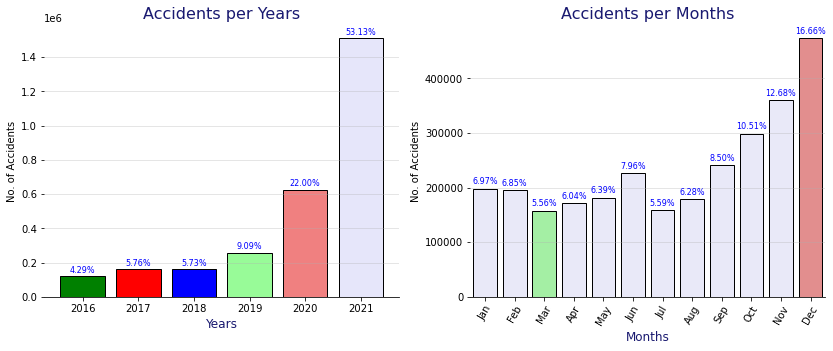

In [216]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))


# plot for year

light_palette = sns.color_palette(palette='pastel')

year_color_map = ['Lavender','LightCoral','PaleGreen','red', 'blue', 'green']

years = ax1.bar(year.index.values , year, color=year_color_map , edgecolor = 'black')
ax1.spines[('top')].set_visible(False)
ax1.spines[('right')].set_visible(False)
ax1.set_xlabel("Years", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax1.set_ylabel("No. of Accidents")
ax1.set_title('Accidents per Years', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

for p in ax1.patches :
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2,
            height + 20000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 8, color='Blue')

    month_color_map = ['Lavender' for _ in range(12)]
month_color_map[11] = 'LightCoral' #light_palette[0]
month_color_map[2] = 'PaleGreen' #light_palette[2]

m = sns.barplot( x= month.index.map(month_map), y=month,  ax = ax2, palette=month_color_map , edgecolor='black' )
plt.xticks(rotation=60)
ax2.set_xlabel("Months", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax2.set_ylabel("No. of Accidents")
ax2.set_title('Accidents per Months', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
sns.despine(left=True)

for p in ax2.patches :
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2,
            height + 8000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 8, color='blue')

ax1.grid(axis='y', linestyle='-', alpha=0.4)    
ax2.grid(axis='y', linestyle='-', alpha=0.4) 
    
plt.show()

<AxesSubplot:xlabel='Year,Month'>

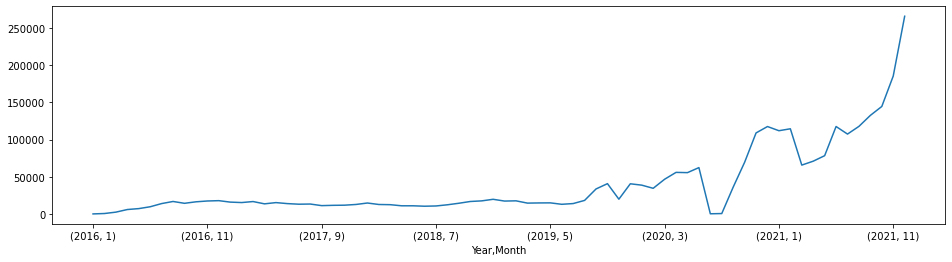

In [21]:
fig = plt.figure(figsize = (16, 4))
data.groupby(by=['Year', 'Month']).size().plot()

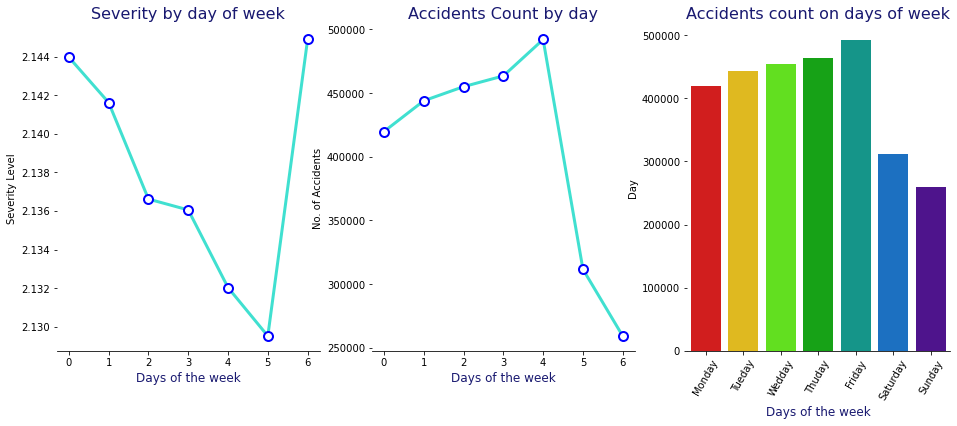

In [22]:
fig, (ax , ax2, ax3) = plt.subplots(1,3,figsize = (16,6))

sns.set_context('paper')

ax.plot(day_severity['Severity'] ,  color='Turquoise', label=day_map,linewidth=3,
           linestyle='solid',marker='.',markersize=18, markerfacecolor='w',markeredgecolor='b',markeredgewidth='2')


ax.set_xlabel("Days of the week", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax.set_ylabel("Severity Level")
ax.set_title('Severity by day of week', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})


ax2.plot(day_severity['Day'] ,  color='Turquoise', label=day_map,linewidth=3,
           linestyle='solid',marker='.',markersize=18, markerfacecolor='w',markeredgecolor='b',markeredgewidth='2')

ax2.set_xlabel("Days of the week", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax2.set_ylabel("No. of Accidents")
ax2.set_title('Accidents Count by day', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

f2 = sns.barplot(x=day_severity['Day'].index.map(day_map) , y=day_severity['Day'], ax = ax3, palette = 'nipy_spectral_r')
plt.xticks(rotation=60)
ax3.set_xlabel("Days of the week", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax3.set_title('Accidents count on days of week', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

sns.despine(left=True)

fig.show()

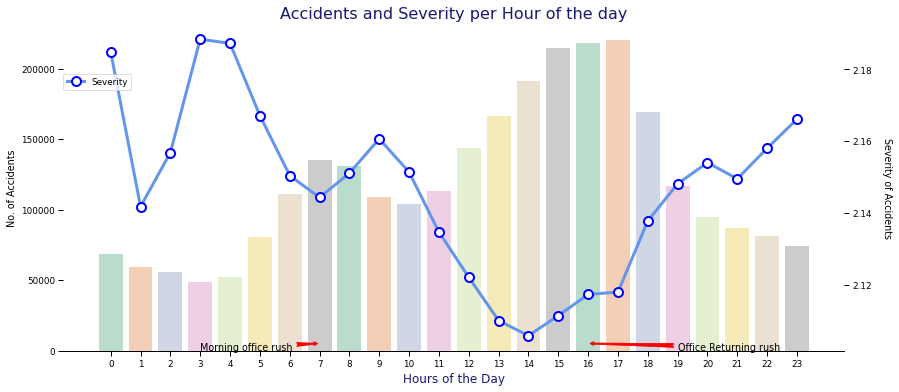

In [23]:
fig, ax = plt.subplots(1,1,figsize = (14,6))

sns.set_context('paper')

f = sns.barplot(x=hour_severity['Hour'].index , y=hour_severity['Hour'], ax = ax, palette='Pastel2')

ax2 = ax.twinx()

ax2.plot(hour_severity['Severity'] , color='CornFlowerBlue', label='Severity',linewidth=3,
           linestyle='solid',marker='.',markersize=18, markerfacecolor='w',markeredgecolor='b',markeredgewidth='2')

sns.despine(left=True)
ax2.spines[('top')].set_visible(False)
ax2.spines[('right')].set_visible(False)
ax2.spines[('left')].set_visible(False)
ax.set_xlabel("Hours of the Day", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax.set_ylabel("No. of Accidents")
ax2.set_ylabel("Severity of Accidents", rotation=270 ,labelpad=20)
ax.set_title('Accidents and Severity per Hour of the day', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
ax2.legend(loc=(0,0.8))

ax.annotate('Morning office rush' , xytext=(3,500) , xy=(7,5000),arrowprops={'arrowstyle':'fancy' , 'color':'Red'})
ax.annotate('Office Returning rush' , xytext=(19,500),xy=(16,5000),arrowprops={'arrowstyle':'fancy', 'color':'Red'})

fig.show()

In [24]:
sev_4_mean = data[data['Severity'] == 4][['Severity','Year']].groupby('Year').count().mean()

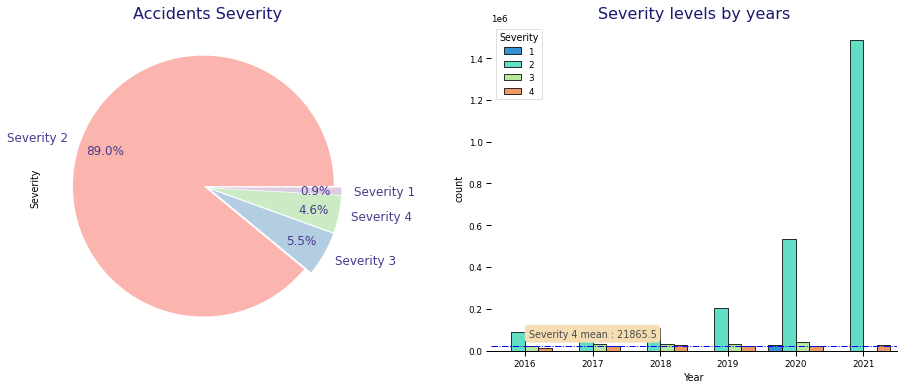

In [25]:
f , (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

data['Severity'].value_counts().plot.pie(autopct = '%1.1f%%' , ax=ax1, colors =sns.color_palette(palette='Pastel1') ,
                                      pctdistance = 0.8, explode = [.03,.03,.03,.03], 
                                       textprops = {'fontsize' : 12 , 'color' : 'DarkSlateBlue'},
                                       labels=['Severity 2','Severity 3' , 'Severity 4' , 'Severity 1']
                              )

ax1.set_title("Accidents Severity", fontdict = {'fontsize':16 , 'color':'MidnightBlue'} )


s = sns.countplot(data=data[['Severity','Year']] , x = 'Year' , hue='Severity' , ax=ax2, palette = 'rainbow' 
                  , edgecolor='black')
ax2.axhline(sev_4_mean[0] ,color='Blue', linewidth=1, linestyle='dashdot')
ax2.annotate(f"Severity 4 mean : {sev_4_mean[0]}",
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='Wheat', linewidth=0),
            xy=(1,80000))

ax2.set_title("Severity levels by years", fontdict = {'fontsize':16 , 'color':'MidnightBlue'} )

sns.despine(left=True)


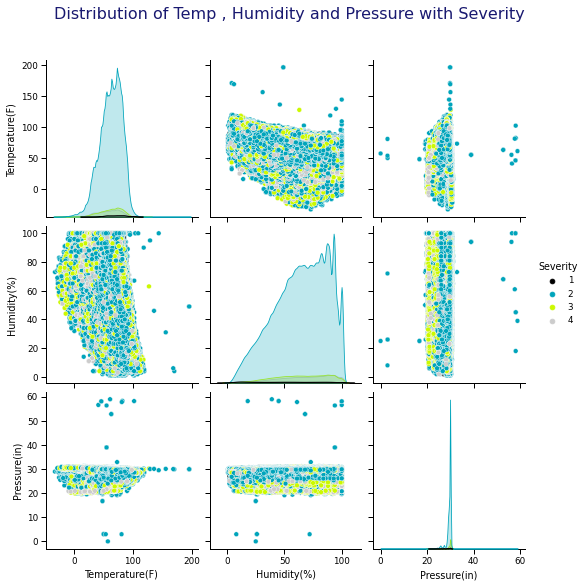

In [26]:
pair = sns.pairplot(data[['Severity','Temperature(F)','Humidity(%)','Pressure(in)']].dropna(), hue='Severity', palette='nipy_spectral')
# pair = sns.pairplot(df[['Severity','Temperature(F)']].dropna(), hue='Severity', palette='nipy_spectral')

pair.fig.suptitle('Distribution of Temp , Humidity and Pressure with Severity', y =1.08 
                  , fontsize = 16 , color = 'MidnightBlue' , ha = 'center' , va='top')

plt.show()

In [27]:
data['Severity'] = data['Severity'].astype('int')

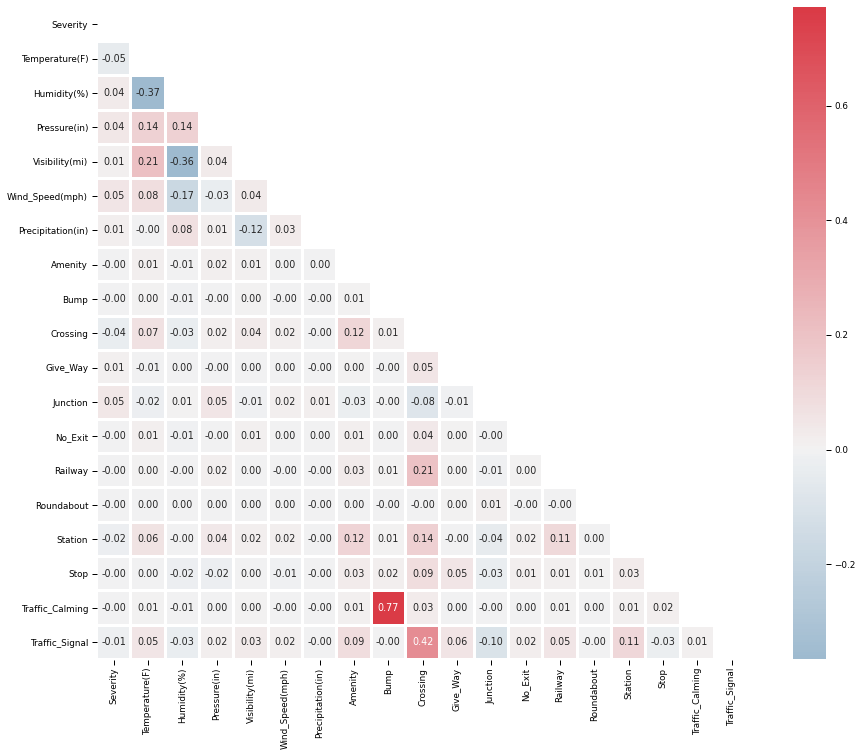

In [29]:
features = ['Severity','Temperature(F)', 'Humidity(%)', 
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 
       'Sunrise_Sunset']

mask = np.zeros_like(data[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


plt.figure(figsize=(16,12))
sns.heatmap(data[features].corr(), cmap=sns.diverging_palette(240, 10, as_cmap=True), square=True, 
            annot=True, fmt='.2f', center=0, linewidth=2, cbar=True , mask = mask)


plt.show()

(24.566027, 49.00058)

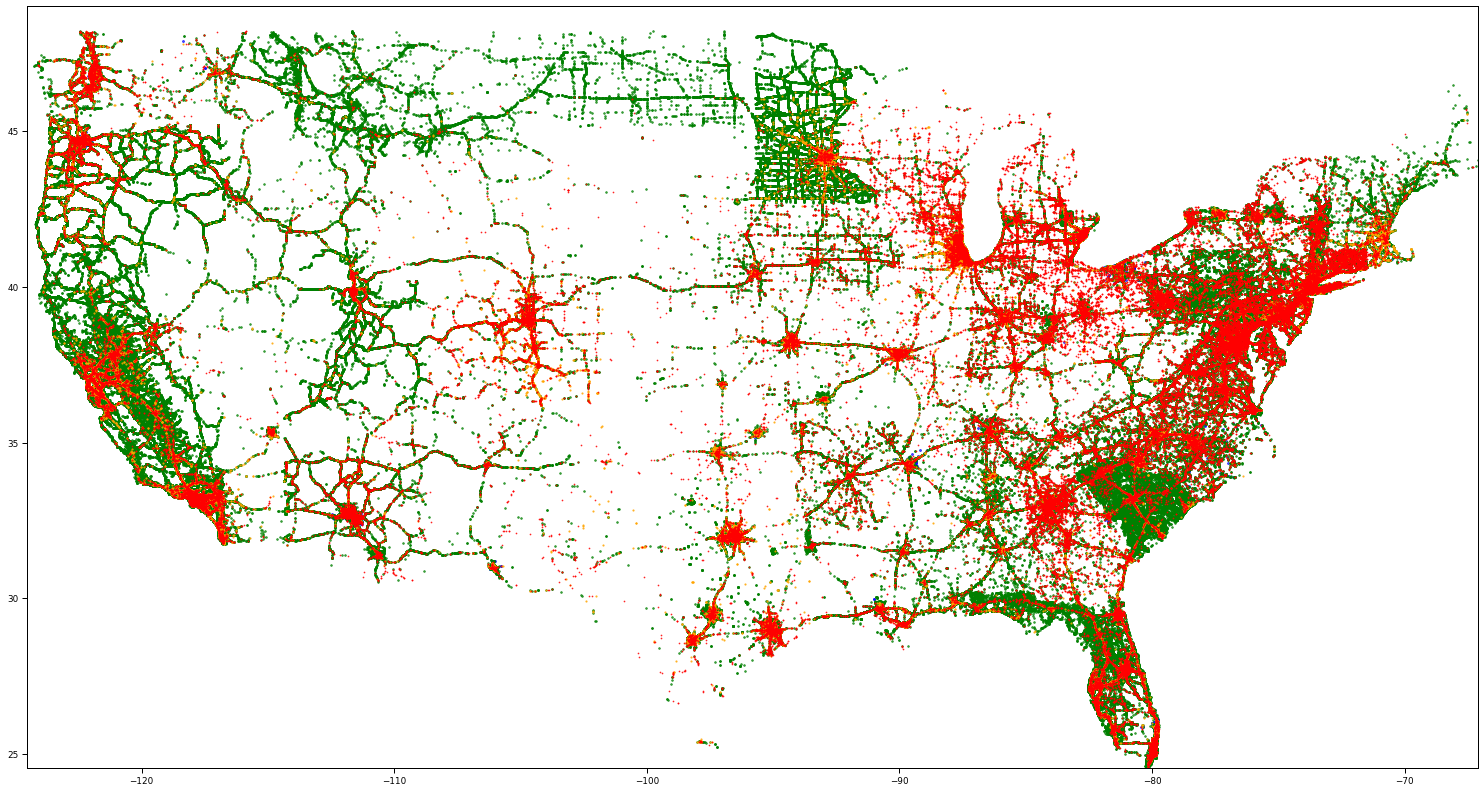

In [30]:
BBox = ((data.Start_Lng.min(), data.Start_Lng.max(), data.Start_Lat.min(), data.Start_Lat.max()))
# map_pic = plt.imread('map1.png')


fig, ax = plt.subplots(figsize = (26,14))
ax.scatter(data[data['Severity']==1].Start_Lng+0.3, data[data['Severity']==1].Start_Lat-0.8, zorder=1, alpha= 0.7, c='blue', s=4)
ax.scatter(data[data['Severity']==2].Start_Lng+0.3, data[data['Severity']==2].Start_Lat-0.8, zorder=1, alpha= 0.7, c='green', s=3)
ax.scatter(data[data['Severity']==3].Start_Lng+0.3, data[data['Severity']==3].Start_Lat-0.8, zorder=1, alpha= 0.7, c='orange', s=2)
ax.scatter(data[data['Severity']==4].Start_Lng+0.3, data[data['Severity']==4].Start_Lat-0.8, zorder=1, alpha= 0.7, c='red', s=1)

ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
# ax.imshow(map_pic, zorder=0, extent = BBox, aspect= 'auto', interpolation='none')
# ax.imshow(map_pic, zorder=2, alpha= 0.5, extent = BBox, aspect= 'auto')

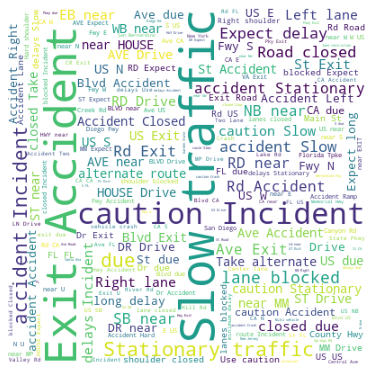

In [31]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(data['Description'].to_list())
wordcloud = WordCloud(width = 400, height = 400, background_color = 'white', stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(figsize = (5, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

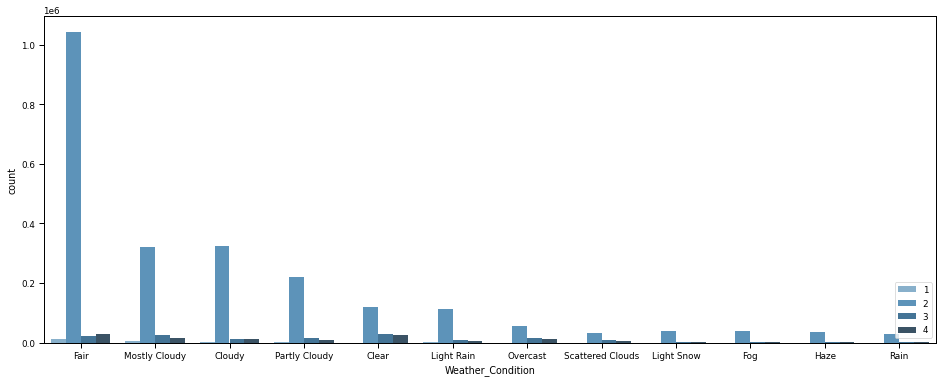

In [32]:
fig = plt.figure(figsize = (16, 6))
sns.countplot(x="Weather_Condition", data=data, order=data['Weather_Condition'].value_counts()[:12].index, hue='Severity', palette='Blues_d')
plt.legend(loc='lower right')
plt.show()

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 52 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Number                 float64       
 11  Street                 object        
 12  Side                   object        
 13  City                   object        
 14  County                 object        
 15  State                  object        
 16  Zipcode                object        
 17  Country                object        
 18  Timezone              

In [182]:
data.isna().mean()

ID                       0.000000e+00
Severity                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Start_Lng                0.000000e+00
End_Lat                  0.000000e+00
End_Lng                  0.000000e+00
Distance(mi)             0.000000e+00
Description              0.000000e+00
Number                   6.129003e-01
Street                   7.029032e-07
Side                     0.000000e+00
City                     4.814887e-05
County                   0.000000e+00
State                    0.000000e+00
Zipcode                  4.635647e-04
Country                  0.000000e+00
Timezone                 1.285961e-03
Airport_Code             3.356011e-03
Weather_Timestamp        1.783125e-02
Temperature(F)           2.434646e-02
Wind_Chill(F)            1.650568e-01
Humidity(%)              2.568830e-02
Pressure(in)             2.080593e-02
Visibility(mi)           2.479350e-02
Wind_Directi

In [183]:
null_columns = ['End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)', 'Precipitation(in)']

data.drop(null_columns, axis=1, inplace = True)

In [184]:
data.isna().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   0
Street                        2
Side                          0
City                        137
County                        0
State                         0
Zipcode                    1319
Country                       0
Timezone                   3659
Airport_Code               9549
Weather_Timestamp         50736
Temperature(F)            69274
Humidity(%)               73092
Pressure(in)              59200
Visibility(mi)            70546
Wind_Direction            73775
Wind_Speed(mph)          157944
Weather_Condition         70636
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway 

In [185]:
data.dropna(axis=0, inplace = True)

In [186]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Hour,DelayTime,Day
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,...,False,Night,Night,Night,Night,2016,2,0,6.0,0
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,0.500,At Mitchell Ave/Exit 6 - Accident.,I-75 S,R,...,False,Day,Day,Day,Day,2016,2,7,6.0,0
5,A-6,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,1.427,At Dela Palma Rd - Accident.,State Route 32,R,...,False,Day,Day,Day,Day,2016,2,8,6.0,0
6,A-7,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,0.227,At OH-4/Exit 54 - Accident.,I-75 S,R,...,False,Day,Day,Day,Day,2016,2,8,6.0,0
7,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,0.521,At Bagley Rd/Exit 235 - Accident.,I-71 S,R,...,False,Day,Day,Day,Day,2016,2,11,6.0,0


In [187]:
print("Total missing values:", data.isna().sum().sum())

Total missing values: 0


In [188]:
{column: len(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'ID': 2655883,
 'Description': 1115045,
 'Street': 154064,
 'Side': 2,
 'City': 10788,
 'County': 1668,
 'State': 49,
 'Zipcode': 347059,
 'Country': 1,
 'Timezone': 4,
 'Airport_Code': 1947,
 'Weather_Timestamp': 444273,
 'Wind_Direction': 23,
 'Weather_Condition': 123,
 'Sunrise_Sunset': 2,
 'Civil_Twilight': 2,
 'Nautical_Twilight': 2,
 'Astronomical_Twilight': 2}

In [189]:
unneeded_columns = ['ID', 'Description', 'Street', 'City', 'Zipcode', 'Country']
data.columns.to_list()
data.drop(unneeded_columns, axis=1, inplace = True)

In [190]:
data.columns.to_list()

['Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Side',
 'County',
 'State',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight',
 'Year',
 'Month',
 'Hour',
 'DelayTime',
 'Day']

In [ ]:
import datetime
date= data['Start_Time']
print(len(date))
months_list=[]
for i in range(len(date)):
#     h=data.iloc[i]
#     h=h['Start_Time']
#     str_h= str(h)
#     #print(h)
#     h= datetime.datetime.strptime(str_h, "%Y-%m-%d %H:%M:%S")
#     months_=h.month
    #print(months_)
    #print(h)
    months=data.iloc[i]
    months=months['Start_Time'].month
    months_list.append(months)
data['Start_Time_Month']=months_list
print(data['Start_Time_Month'])
    #print(months)

In [ ]:
date= data['Start_Time']
print(len(date))
years_list=[]
for i in range(len(data)):
    years=data.iloc[i]
    years=years['Start_Time'].year
    years_list.append(years)
data['Start_Time_Year']=years_list
print(data['Start_Time_Year'])

In [ ]:
date= data['End_Time']
print(len(date))
months_list=[]
for i in range(len(data)):
    months=data.iloc[i]
    months=months['End_Time'].month
    months_list.append(months)
data['End_Time_Month']=months_list

In [ ]:
date= data['End_Time']
print(len(date))
years_list=[]
for i in range(len(data)):
    years=data.iloc[i]
    years=years['End_Time'].year
    years_list.append(years)
data['End_Time_Year']=years_list

In [191]:
data = data.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], axis=1)

In [192]:
data

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,County,State,Timezone,Airport_Code,Temperature(F),...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Hour,DelayTime,Day
0,3,40.108910,-83.092860,3.230,R,Franklin,OH,US/Eastern,KOSU,42.1,...,False,Night,Night,Night,Night,2016,2,0,6.0,0
4,3,39.172393,-84.492792,0.500,R,Hamilton,OH,US/Eastern,KLUK,37.0,...,False,Day,Day,Day,Day,2016,2,7,6.0,0
5,2,39.063240,-84.032430,1.427,R,Clermont,OH,US/Eastern,KI69,35.6,...,False,Day,Day,Day,Day,2016,2,8,6.0,0
6,2,39.775650,-84.186030,0.227,R,Montgomery,OH,US/Eastern,KFFO,33.8,...,False,Day,Day,Day,Day,2016,2,8,6.0,0
7,2,41.375310,-81.820170,0.521,R,Cuyahoga,OH,US/Eastern,KCLE,33.1,...,False,Day,Day,Day,Day,2016,2,11,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,34.002480,-117.379360,0.543,R,Riverside,CA,US/Pacific,KRAL,86.0,...,False,Day,Day,Day,Day,2019,8,18,0.5,4
2845338,2,32.766960,-117.148060,0.338,R,San Diego,CA,US/Pacific,KMYF,70.0,...,False,Day,Day,Day,Day,2019,8,19,0.4,4
2845339,2,33.775450,-117.847790,0.561,R,Orange,CA,US/Pacific,KSNA,73.0,...,False,Day,Day,Day,Day,2019,8,19,0.5,4
2845340,2,33.992460,-118.403020,0.772,R,Los Angeles,CA,US/Pacific,KSMO,71.0,...,False,Day,Day,Day,Day,2019,8,19,0.5,4


In [193]:
print("Total missing values:", data.isna().sum().sum())

Total missing values: 0


# StandardScaling the data

In [194]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [195]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [196]:
columns= ['Side', 'County', 'State', 'Timezone', 'Airport_Code', 'Wind_Direction', 'Weather_Condition']

In [206]:
for i in columns:
    le.fit(data[i])
    data[i] = le.transform(data[i])

In [205]:
for i in columns:
    print(f"column_name: {i}")
    state_encoder = preprocessing.LabelEncoder()
    state_encoder.fit(data[i])
    state_labels = state_encoder.classes_
    state_levels = state_encoder.transform(state_labels)
    for label, value in zip(state_labels, state_levels):
        print(f"{label}: {value}")

column_name: Side
L: 0
R: 1
column_name: County
Abbeville: 0
Acadia: 1
Accomack: 2
Ada: 3
Adair: 4
Adams: 5
Addison: 6
Aiken: 7
Aitkin: 8
Alachua: 9
Alamance: 10
Alameda: 11
Alamosa: 12
Albany: 13
Albemarle: 14
Alcona: 15
Alcorn: 16
Alexander: 17
Alexandria: 18
Alexandria City: 19
Allamakee: 20
Allegan: 21
Allegany: 22
Alleghany: 23
Allegheny: 24
Allen: 25
Allendale: 26
Alpena: 27
Alpine: 28
Amador: 29
Amelia: 30
Amherst: 31
Amite: 32
Anderson: 33
Andrew: 34
Andrews: 35
Androscoggin: 36
Angelina: 37
Anne Arundel: 38
Anoka: 39
Anson: 40
Antrim: 41
Apache: 42
Appanoose: 43
Appling: 44
Appomattox: 45
Arapahoe: 46
Archer: 47
Archuleta: 48
Arenac: 49
Arkansas: 50
Arlington: 51
Armstrong: 52
Aroostook: 53
Ascension: 54
Ashe: 55
Ashland: 56
Ashley: 57
Ashtabula: 58
Asotin: 59
Assumption: 60
Atascosa: 61
Atchison: 62
Athens: 63
Atkinson: 64
Atlantic: 65
Atoka: 66
Attala: 67
Audubon: 68
Auglaize: 69
Augusta: 70
Aurora: 71
Austin: 72
Autauga: 73
Avery: 74
Avoyelles: 75
Bacon: 76
Bailey: 77
Baker

US/Central: 0
US/Eastern: 1
US/Mountain: 2
US/Pacific: 3
column_name: Airport_Code
K01M: 0
K04V: 1
K04W: 2
K08D: 3
K0A9: 4
K0CO: 5
K0E0: 6
K0F2: 7
K0J4: 8
K0VG: 9
K11R: 10
K12N: 11
K14Y: 12
K1A5: 13
K1A6: 14
K1F0: 15
K1H2: 16
K1II: 17
K1J0: 18
K1M4: 19
K1P1: 20
K1R7: 21
K1V6: 22
K1YT: 23
K20U: 24
K20V: 25
K21D: 26
K27A: 27
K2C8: 28
K2D5: 29
K2DP: 30
K2G4: 31
K2J9: 32
K2V5: 33
K2W6: 34
K33V: 35
K36U: 36
K3A1: 37
K3A6: 38
K3DU: 39
K3HT: 40
K3I2: 41
K3J7: 42
K3LF: 43
K3R7: 44
K3T5: 45
K3TH: 46
K40J: 47
K42J: 48
K46D: 49
K48I: 50
K4A6: 51
K4A9: 52
K4BL: 53
K4BM: 54
K4CR: 55
K4HV: 56
K4I3: 57
K4M9: 58
K4MR: 59
K4SL: 60
K54J: 61
K5C1: 62
K5H4: 63
K5M9: 64
K5SM: 65
K5T6: 66
K5W8: 67
K65S: 68
K6A1: 69
K6A2: 70
K6B0: 71
K6R3: 72
K77M: 73
K79J: 74
K7L2: 75
K7R3: 76
K82V: 77
K87Q: 78
K8A0: 79
K9A1: 80
K9A4: 81
K9BB: 82
K9L2: 83
K9MN: 84
K9V9: 85
KAAA: 86
KAAF: 87
KAAO: 88
KAAT: 89
KABE: 90
KABI: 91
KABQ: 92
KABY: 93
KACB: 94
KACJ: 95
KACQ: 96
KACT: 97
KACV: 98
KACY: 99
KADC: 100
KADG: 101
KADH: 1

CALM: 0
E: 1
ENE: 2
ESE: 3
East: 4
N: 5
NE: 6
NNE: 7
NNW: 8
NW: 9
North: 10
S: 11
SE: 12
SSE: 13
SSW: 14
SW: 15
South: 16
VAR: 17
Variable: 18
W: 19
WNW: 20
WSW: 21
West: 22
column_name: Weather_Condition
Blowing Dust: 0
Blowing Dust / Windy: 1
Blowing Sand: 2
Blowing Snow: 3
Blowing Snow / Windy: 4
Blowing Snow Nearby: 5
Clear: 6
Cloudy: 7
Cloudy / Windy: 8
Drifting Snow: 9
Drizzle: 10
Drizzle / Windy: 11
Drizzle and Fog: 12
Dust Whirls: 13
Fair: 14
Fair / Windy: 15
Fog: 16
Fog / Windy: 17
Freezing Drizzle: 18
Freezing Rain: 19
Freezing Rain / Windy: 20
Funnel Cloud: 21
Hail: 22
Haze: 23
Haze / Windy: 24
Heavy Blowing Snow: 25
Heavy Drizzle: 26
Heavy Freezing Drizzle: 27
Heavy Freezing Rain: 28
Heavy Ice Pellets: 29
Heavy Rain: 30
Heavy Rain / Windy: 31
Heavy Rain Shower: 32
Heavy Rain Shower / Windy: 33
Heavy Rain Showers: 34
Heavy Sleet: 35
Heavy Snow: 36
Heavy Snow / Windy: 37
Heavy Snow with Thunder: 38
Heavy T-Storm: 39
Heavy T-Storm / Windy: 40
Heavy Thunderstorms and Rain: 41
H

In [208]:
def get_binary_column(df, column):
        return data[column].apply(lambda x: 1 if x == 'Day' else 0)

In [209]:
data['Sunrise_Sunset'] = get_binary_column(data, 'Sunrise_Sunset')
data['Civil_Twilight'] = get_binary_column(data, 'Civil_Twilight')
data['Nautical_Twilight'] = get_binary_column(data, 'Nautical_Twilight')
data['Astronomical_Twilight'] = get_binary_column(data, 'Astronomical_Twilight')

In [210]:
data.isnull().sum()

Severity                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Side                     0
County                   0
State                    0
Timezone                 0
Airport_Code             0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
Year                     0
Month                    0
Hour                     0
DelayTime                0
D

In [211]:
data_y = data['Severity']
data_X = data.drop('Severity', axis=1)
#data_X = X.astype(np.float)

In [212]:
data_X

,Start_Lat,Start_Lng,Distance(mi),Side,County,State,Timezone,Airport_Code,Temperature(F),Humidity(%),...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Hour,DelayTime,Day
0,40.108910,-83.092860,3.230,1,536,33,1,1416,42.1,58.0,...,False,0,0,0,0,2016,2,0,6.0,0
4,39.172393,-84.492792,0.500,1,640,33,1,1119,37.0,93.0,...,False,0,0,0,0,2016,2,7,6.0,0
5,39.063240,-84.032430,1.427,1,317,33,1,933,35.6,100.0,...,False,0,0,0,0,2016,2,8,6.0,0
6,39.775650,-84.186030,0.227,1,1009,33,1,680,33.8,100.0,...,False,0,0,0,0,2016,2,8,6.0,0
7,41.375310,-81.820170,0.521,1,389,33,1,397,33.1,92.0,...,False,0,0,0,0,2016,2,11,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,34.002480,-117.379360,0.543,1,1265,3,3,1544,86.0,40.0,...,False,0,0,0,0,2019,8,18,0.5,4
2845338,32.766960,-117.148060,0.338,1,1317,3,3,1296,70.0,73.0,...,False,0,0,0,0,2019,8,19,0.4,4
2845339,33.775450,-117.847790,0.561,1,1104,3,3,1709,73.0,64.0,...,False,0,0,0,0,2019,8,19,0.5,4
2845340,33.992460,-118.403020,0.772,1,875,3,3,1704,71.0,81.0,...,False,0,0,0,0,2019,8,19,0.5,4


In [213]:
scaler = StandardScaler()

data_X = scaler.fit_transform(data_X)

In [ ]:
import sklearn

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, train_size=0.75, random_state=100)

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

# **Logistic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logistic_model = LogisticRegression(random_state=0).fit(X_train, y_train)

In [51]:
y_pred_logistic= logistic_model.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic, average="weighted")
precision = precision_score(y_test, y_pred_logistic, average="weighted")
cf_matrix = confusion_matrix(y_test, y_pred_logistic)
print("Results of Logistic Regression")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("Confusion Matrix   : ")
print(cf_matrix)

Results of Logistic Regression
Accuracy    :  0.8946384706560979
Recall      :  0.8946384706560979
Precision   :  0.8539889299254698
Confusion Matrix   : 
[[   325   6071      0      3]
 [   267 589469   5089    889]
 [    57  30526   3013    309]
 [    39  25701   1006   1207]]


# **Decision Tree**

In [53]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
y_pred_dt= decision_tree_model.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt, average="weighted")
precision = precision_score(y_test, y_pred_dt, average="weighted")
cf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Results of Decision Tree")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("Confusion Matrix   : ")
print(cf_matrix)

Results of Decision Tree
Accuracy    :  0.9040967150673749
Recall      :  0.9040967150673749
Precision   :  0.9061424711701926
Confusion Matrix   : 
[[  4309   1440    484    166]
 [  1456 566478  14603  13177]
 [   455  13523  16628   3299]
 [   170  11576   3328  12879]]


In [56]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
decision_tree_m = DecisionTreeClassifier(max_depth=4,random_state=42)
decision_tree_m.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

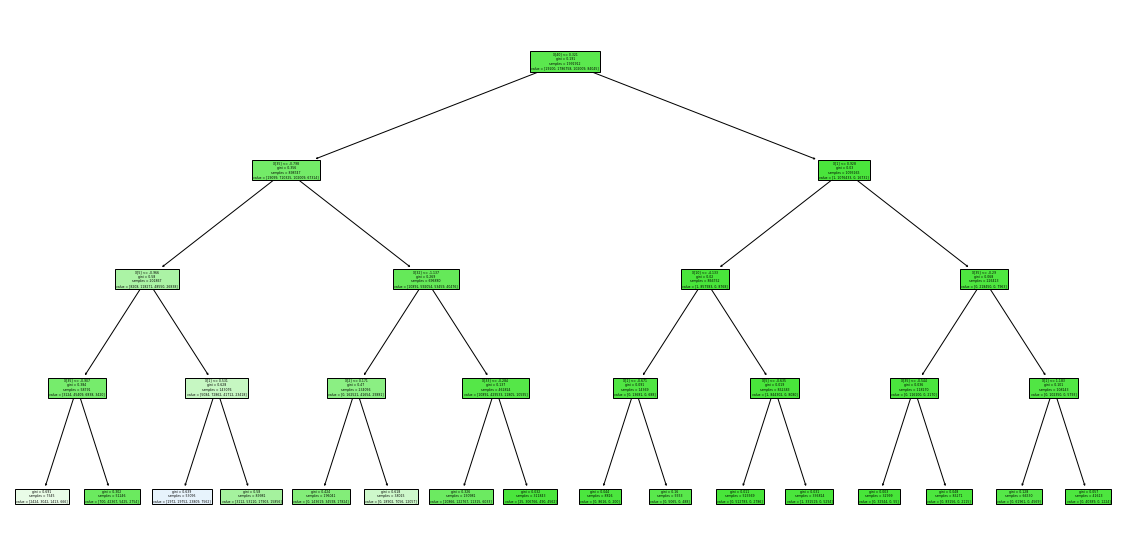

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(decision_tree_m, filled=True)
plt.savefig('decision_tree for the dataset')
plt.show()

# **Random Forest**

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)

In [59]:
rf.fit(X_train, y_train);

In [60]:
y_pred_rf= rf.predict(X_test)

In [61]:
y_pred_int_rf = y_pred_rf.astype(int)


In [62]:
accuracy = accuracy_score(y_test, y_pred_int_rf)
recall = recall_score(y_test, y_pred_int_rf, average="weighted")
precision = precision_score(y_test, y_pred_int_rf, average="weighted")
cf_matrix = confusion_matrix(y_test, y_pred_int_rf)
print("Results of Random Forest")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("Confusion Matrix   : ")
print(cf_matrix)

Results of Random Forest
Accuracy    :  0.9039777339672967
Recall      :  0.9039777339672967
Precision   :  0.901722354710279
Confusion Matrix   : 
[[  5275   1066     57      1]
 [  4118 583827   7651    118]
 [   524  24230   9111     40]
 [   142  13008  12801   2002]]
